In [1]:
using Knet, Images
include(Knet.dir("data/mnist.jl"))
xtrn,ytrn,xtst,ytst = mnist()
xtrn7x7 = zeros(Float32,7,7,1,60000)
xtst7x7 = zeros(Float32,7,7,1,10000)
@time for i in 1:60000; xtrn7x7[:,:,1,i] .= imresize(xtrn[5:24,5:24,1,i],(7,7)); end
@time for i in 1:10000; xtst7x7[:,:,1,i] .= imresize(xtst[5:24,5:24,1,i],(7,7)); end
Knet.save("mnist7x7.jld2","xtrn",reshape(xtrn7x7,49,:),"ytrn",ytrn,"xtst",reshape(xtst7x7,49,:),"ytst",ytst)

┌ Info: Loading MNIST...
└ @ Main /home/ec2-user/.julia/packages/Knet/HwZrA/data/mnist.jl:33


  1.218147 seconds (3.17 M allocations: 357.288 MiB, 6.38% gc time)
  0.056302 seconds (157.96 k allocations: 40.710 MiB, 12.51% gc time)


In [2]:
summary.(values(Knet.load("mnist7x7.jld2")))

4-element Array{String,1}:
 "49×60000 Array{Float32,2}"   
 "10000-element Array{UInt8,1}"
 "60000-element Array{UInt8,1}"
 "49×10000 Array{Float32,2}"   

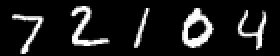

In [3]:
hcat([mnistview(xtst,i) for i=1:5]...)

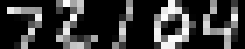

In [4]:
hcat([mnistview(xtst7x7,i) for i=1:5]...)